In [458]:
# Importing necessary librarues

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
pd.set_option('display.max_columns', None)
import pickle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [373]:
names=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
       'sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid',
      'lithium','goitre','tumor','hypopituitary','psych','TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4','T4U_measured',
      'T4U','FTI_measured','FTI','TBG_measured','TBG','referral_source','classes']

In [374]:
df=pd.read_csv('data/allhypo.data',names=names)
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,classes
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


In [375]:
#Split classes column
col_mod=df.classes.str.split('.',expand=True)
df[['last','final']]=col_mod
data=df.drop(['classes','final'],axis=1)

In [376]:
df=data.rename(columns={'last':'classes'})
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,classes
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative


In [377]:
#Checking information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        2800 non-null   object
 1   sex                        2800 non-null   object
 2   on_thyroxine               2800 non-null   object
 3   query_on_thyroxine         2800 non-null   object
 4   on_antithyroid_medication  2800 non-null   object
 5   sick                       2800 non-null   object
 6   pregnant                   2800 non-null   object
 7   thyroid_surgery            2800 non-null   object
 8   I131_treatment             2800 non-null   object
 9   query_hypothyroid          2800 non-null   object
 10  query_hyperthyroid         2800 non-null   object
 11  lithium                    2800 non-null   object
 12  goitre                     2800 non-null   object
 13  tumor                      2800 non-null   object
 14  hypopitu

In [378]:
#Create a copy of dataset for better practice
data = df.copy()

#Shape of the data
data.shape

(2800, 30)

In [379]:
# Display all Columns
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'classes'],
      dtype='object')

In [380]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,classes
count,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,94,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,264,2,65,2,218,2,139,2,210,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,other,negative
freq,75,1830,2470,2760,2766,2690,2759,2761,2752,2637,2627,2786,2775,2729,2799,2665,2516,284,2215,585,2616,184,2503,297,2505,295,2800,2800,1632,2580


In [381]:
#Checking for null values
data.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
classes                      0
dtype: int64

In [382]:
#Checking for unique values in class column
data['classes'].unique()

array(['negative', 'compensated hypothyroid', 'primary hypothyroid',
       'secondary hypothyroid'], dtype=object)

In [383]:
#Checking for unique values in class column
data['classes'].value_counts()

classes
negative                   2580
compensated hypothyroid     154
primary hypothyroid          64
secondary hypothyroid         2
Name: count, dtype: int64

In [384]:
#For checking unique value of every column
for column in data.columns:
    print(column,'--->', (data[column].unique()))

age ---> ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' '?' '93' '92']
sex ---> ['F' 'M' '?']
on_thyroxine ---> ['f' 't']
query_on_thyroxine ---> ['f' 't']
on_antithyroid_medication ---> ['f' 't']
sick ---> ['f' 't']
pregnant ---> ['f' 't']
thyroid_surgery ---> ['f' 't']
I131_treatment ---> ['f' 't']
query_hypothyroid ---> ['f' 't']
query_hyperthyroid ---> ['f' 't']
lithium ---> ['f' 't']
goitre ---> ['f' 't']
tumor ---> ['f' 't']
hypopituitary ---> ['f' 't']
psych ---> ['f' 't']
TSH_measured ---> ['t' 'f']
TSH ---> ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' '?' '2.2' '0.6' '2.4' '1.1' 

In [385]:
col_name = ['on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured']

for col in col_name:
    print(f"No.of 'f' and 't' values are in {col} column")
    print(f"No.of f value in {col} column : {len(data[data[col] == 'f'])}")
    print(f"No.of t value in {col} column : {len(data[data[col] == 't'])}", '\n', '---'*20)

No.of 'f' and 't' values are in on_thyroxine column
No.of f value in on_thyroxine column : 2470
No.of t value in on_thyroxine column : 330 
 ------------------------------------------------------------
No.of 'f' and 't' values are in query_on_thyroxine column
No.of f value in query_on_thyroxine column : 2760
No.of t value in query_on_thyroxine column : 40 
 ------------------------------------------------------------
No.of 'f' and 't' values are in on_antithyroid_medication column
No.of f value in on_antithyroid_medication column : 2766
No.of t value in on_antithyroid_medication column : 34 
 ------------------------------------------------------------
No.of 'f' and 't' values are in sick column
No.of f value in sick column : 2690
No.of t value in sick column : 110 
 ------------------------------------------------------------
No.of 'f' and 't' values are in pregnant column
No.of f value in pregnant column : 2759
No.of t value in pregnant column : 41 
 ---------------------------------

In [386]:
#Checking for '?' value in our data which are null values 
data.isin(['?']).sum()

age                             1
sex                           110
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           284
T3_measured                     0
T3                            585
TT4_measured                    0
TT4                           184
T4U_measured                    0
T4U                           297
FTI_measured                    0
FTI                           295
TBG_measured                    0
TBG                          2800
referral_source                 0
classes       

In [387]:
# we can see that for column 'TBG' all the values are missing. So we will drop this column as it is of no use to us.
data = data.drop(['TBG'], axis=1)

#### On looking dataset, we can see that some of the columns are with true and false value, that are just the indication whether the next column has values or not.

In [388]:
data[['T4U_measured','T4U']] 


,T4U_measured,T4U
0,t,1.14
1,f,?
2,t,0.91
3,f,?
4,t,0.87
...,...,...
2795,t,1.05
2796,t,0.88
2797,t,0.8
2798,t,0.83


In [389]:
## Let's drop some unnecessary columns
data = data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)


#### FTI is highly overall correlated with TT4, so drop TT4

In [390]:
data.drop('TT4', axis = 1, inplace = True)

In [391]:
data.replace('?', np.nan, inplace=True)

In [392]:
# For rechecking 
for col in data.columns:
    count = data[col][data[col]=='?'].count()
    if count==0:
        print(col, data[col][data[col]=='?'].count()) 

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
T4U 0
FTI 0
referral_source 0
classes 0


In [393]:
# checking for null value
data.isna().sum()

age                            1
sex                          110
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          284
T3                           585
T4U                          297
FTI                          295
referral_source                0
classes                        0
dtype: int64

In [394]:
#Now checking for datatypes of columns
data.dtypes

age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
sick                         object
pregnant                     object
thyroid_surgery              object
I131_treatment               object
query_hypothyroid            object
query_hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH                          object
T3                           object
T4U                          object
FTI                          object
referral_source              object
classes                      object
dtype: object

### Convert the Datatype into numerical

In [395]:
# Mapping the categorical column
data['sex'] = data['sex'].map({'F' : 0, 'M' : 1})

In [396]:

col_name = ['on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych',]

for col in col_name:
    if  len(data[col].unique())==2:
        data[col] = data[col].map({'f' : 0, 't' : 1})

In [397]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,T4U,FTI,referral_source,classes
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,1.14,109,SVHC,negative
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,NaN,NaN,other,negative
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,0.91,120,other,negative
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,NaN,NaN,other,negative
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,0.87,70,SVI,negative



### Encoding categorical columns

In [398]:
#Unique values of referral_source column
data['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [399]:
# using one-hot-encoding
data = pd.get_dummies(data, columns=['referral_source'], drop_first=True)

In [400]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,T4U,FTI,classes,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,1.14,109,negative,True,False,False,False
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,NaN,NaN,negative,False,False,False,True
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,0.91,120,negative,False,False,False,True
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,NaN,NaN,negative,False,False,False,True
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,0.87,70,negative,False,False,True,False


In [401]:
data['classes'].unique()

array(['negative', 'compensated hypothyroid', 'primary hypothyroid',
       'secondary hypothyroid'], dtype=object)

In [402]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['classes'] =encoder.fit_transform(data['classes'])

In [403]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,T4U,FTI,classes,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,1.14,109,1,True,False,False,False
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,NaN,NaN,1,False,False,False,True
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,0.91,120,1,False,False,False,True
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,NaN,NaN,1,False,False,False,True
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,0.87,70,1,False,False,True,False


In [404]:
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
# For imputing the missing values
new_array=imputer.fit_transform(data)
# convert the nd-array returned in the step above to a Dataframe
new_data=pd.DataFrame(data=np.round(new_array), columns=data.columns)

In [405]:
new_data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,T4U,FTI,classes,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,109.0,1.0,1.0,0.0,0.0,0.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,89.0,1.0,0.0,0.0,0.0,1.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,120.0,1.0,0.0,0.0,0.0,1.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,148.0,1.0,0.0,0.0,0.0,1.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,70.0,1.0,0.0,0.0,1.0,0.0


In [406]:
new_data.to_csv('data/Thyroid_cleaned_data.csv',index=False)

In [407]:
new_data = pd.read_csv('data/Thyroid_cleaned_data.csv')

## Handling Imbalanced Dataset

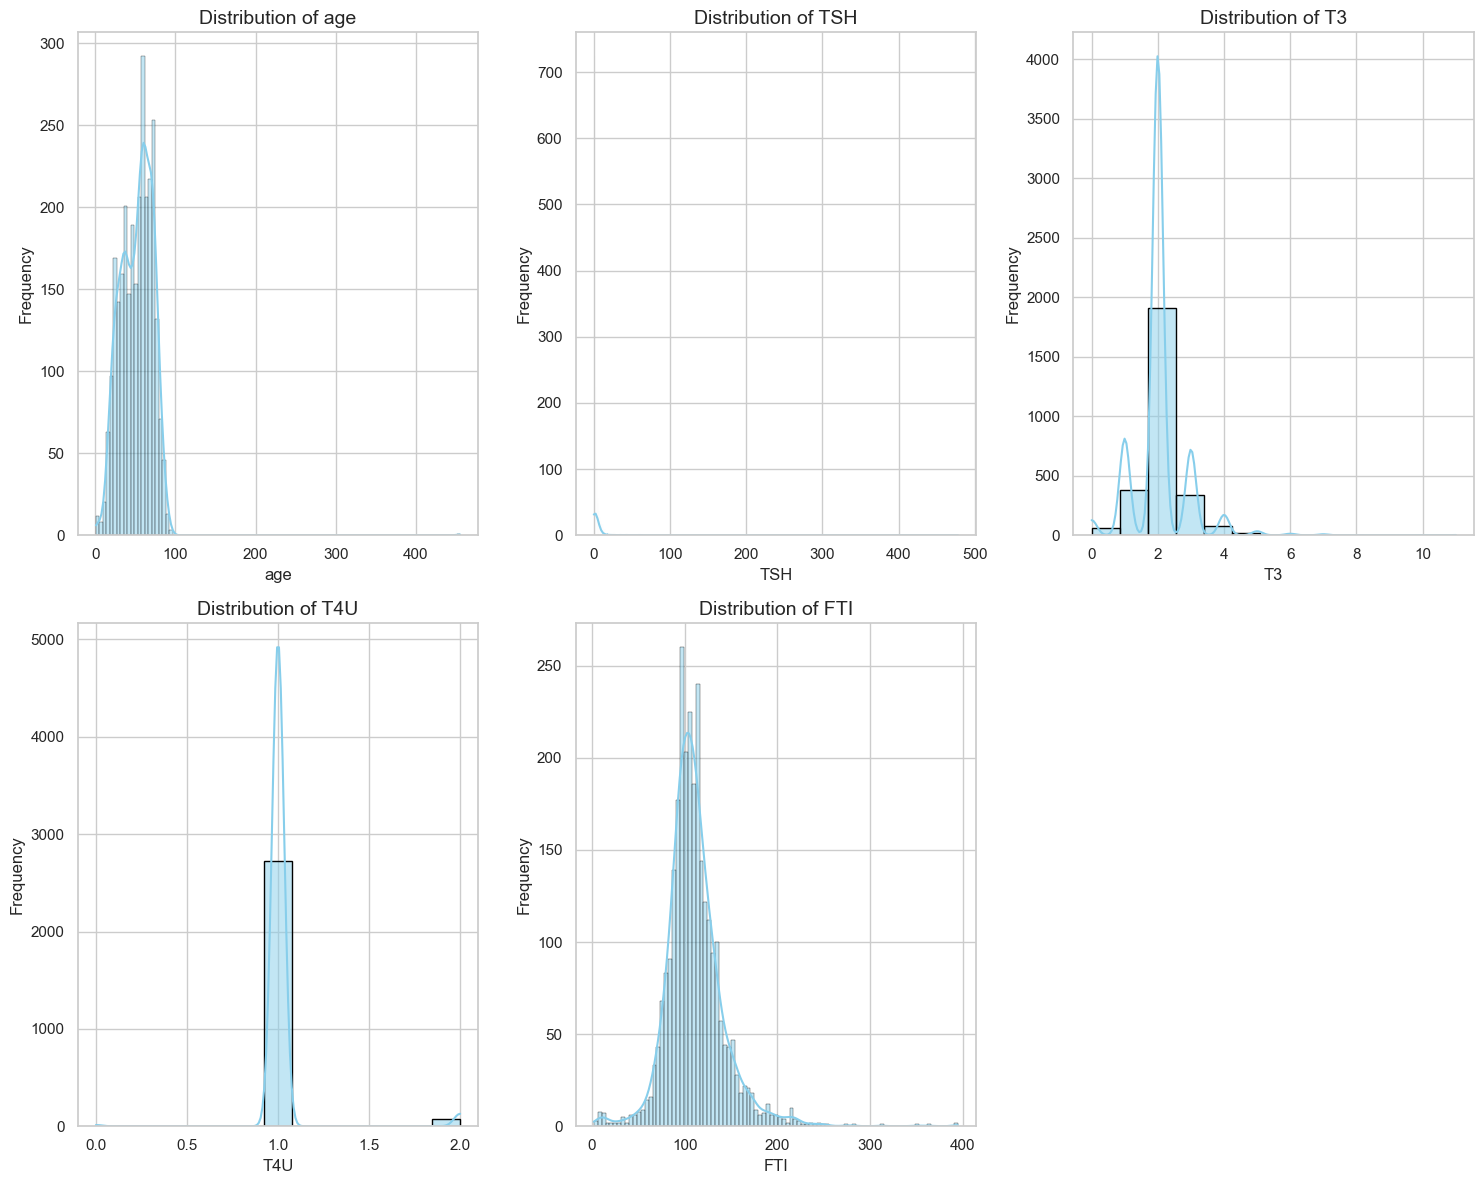

In [408]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['age', 'TSH', 'T3', 'T4U', 'FTI']
plt.figure(figsize=(15, 12), facecolor='white')
rows = 2
cols = 3

for i, column in enumerate(columns, start=1):
    plt.subplot(rows, cols, i)
    sns.histplot(new_data[column], kde=True, color='skyblue', edgecolor='black')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Distribution of {column}', fontsize=14)

plt.tight_layout()
plt.show()


The graphs for age, TSH and T3 looks heavely skewed towards left.

Let's do some transformations to the data and see if it improves the plot.

Before doing log transformation , let's add 1 to each valuue in the column to handle exception when we try to find log of '0'.



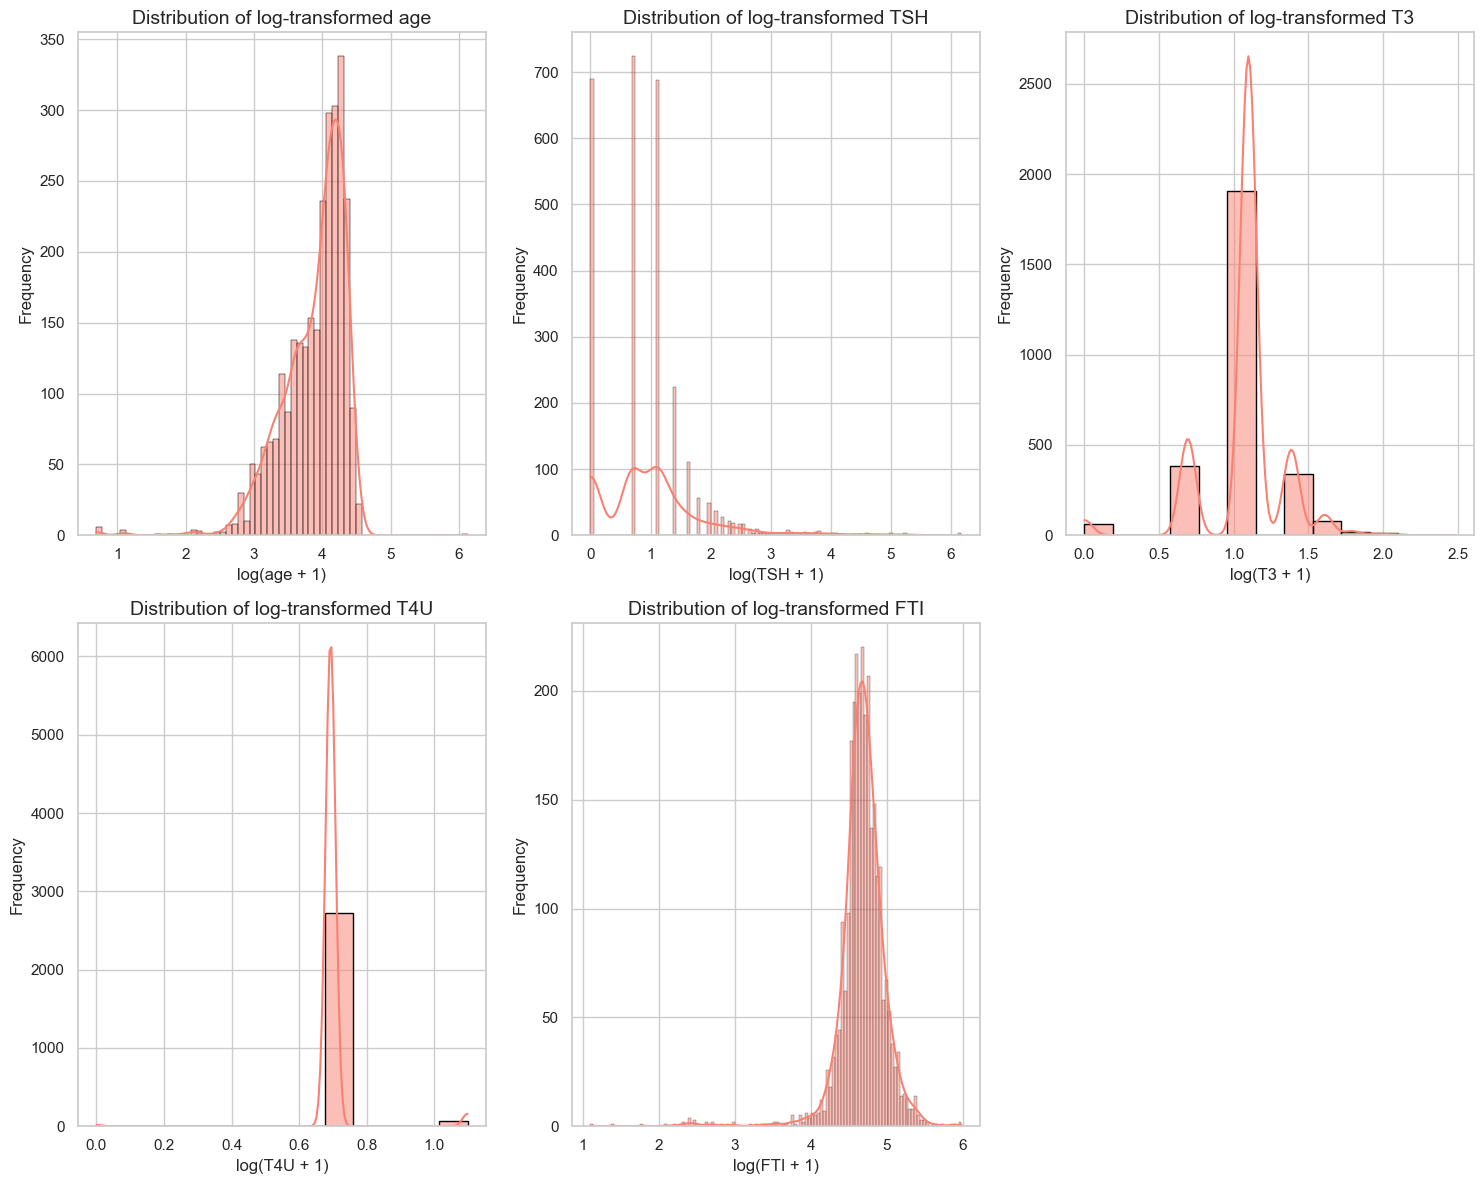

In [409]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

columns = ['age', 'TSH', 'T3', 'T4U', 'FTI']
plt.figure(figsize=(15, 12), facecolor='white')


rows = 2
cols = 3

for i, column in enumerate(columns, start=1):
    # Apply log transformation (adding 1 to avoid log(0) or negative values)
    transformed_data = np.log(new_data[column] + 1)
    
    plt.subplot(rows, cols, i)
    sns.histplot(transformed_data, kde=True, color='salmon', edgecolor='black')
    plt.xlabel(f'log({column} + 1)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Distribution of log-transformed {column}', fontsize=14)

plt.tight_layout()
plt.show()



It won't give much of information so let's drop this column.

In [410]:

new_data = new_data.drop(['TSH'], axis = 1)

In [411]:
new_data.drop_duplicates(inplace=True)

#### Since `referral_source_SVI` is highly overall correlated with `referral_source_other` and `referral_source_SVHC` is highly overall correlated with `psych`. So drop one from both.

In [412]:
new_data = new_data.drop(['referral_source_other','psych'], axis = 1)

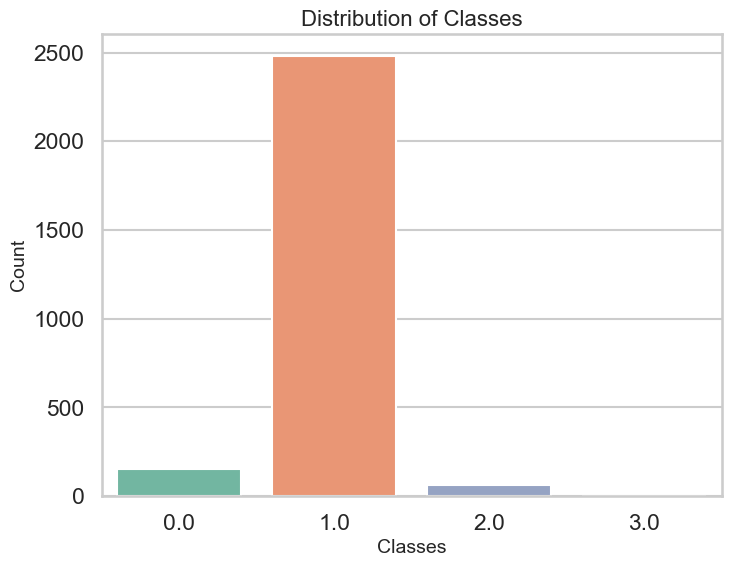

In [413]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("talk")

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=new_data, x='classes', palette='Set2')

# Add title and labels
plt.title('Distribution of Classes', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

#### We can clerly see that the dataset is highly imbalanced.

In [414]:

x = new_data.drop(['classes'],axis=1)
y = new_data['classes']

In [415]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
rdsample = RandomOverSampler()

# Fit and resample the data
x_sampled, y_sampled = rdsample.fit_resample(x, y)

In [416]:
#Checking for shape of x_sample
x_sampled.shape

(9920, 21)

In [417]:
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)
x_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,T3,T4U,FTI,referral_source_SVHC,referral_source_SVHD,referral_source_SVI
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,109.0,1.0,0.0,0.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,89.0,0.0,0.0,0.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,120.0,0.0,0.0,0.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,148.0,0.0,0.0,0.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,70.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,54.0,0.0,0.0,0.0
9916,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,54.0,0.0,0.0,0.0
9917,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,54.0,0.0,0.0,0.0
9918,41.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,110.0,0.0,0.0,0.0


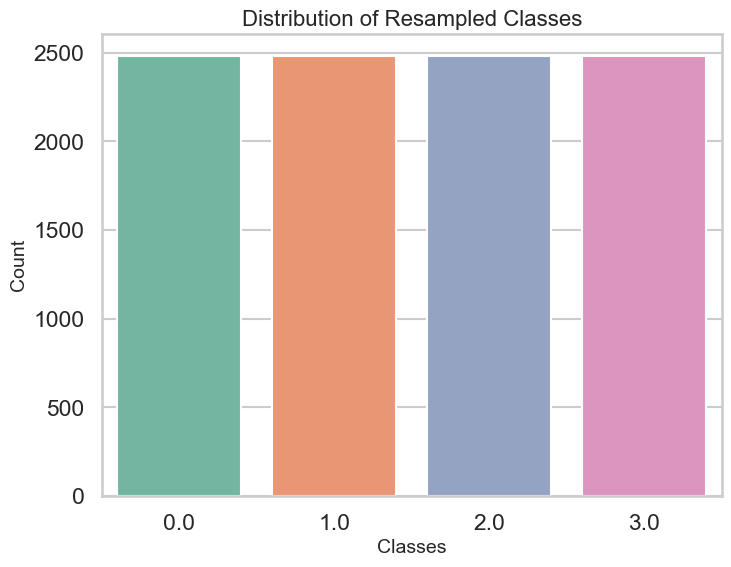

In [418]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(8, 6))
sns.countplot(data=new_data, x=y_sampled, palette='Set2')

# Add title and labels
plt.title('Distribution of Resampled Classes', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

## Great! Now the dataset is Balanced.

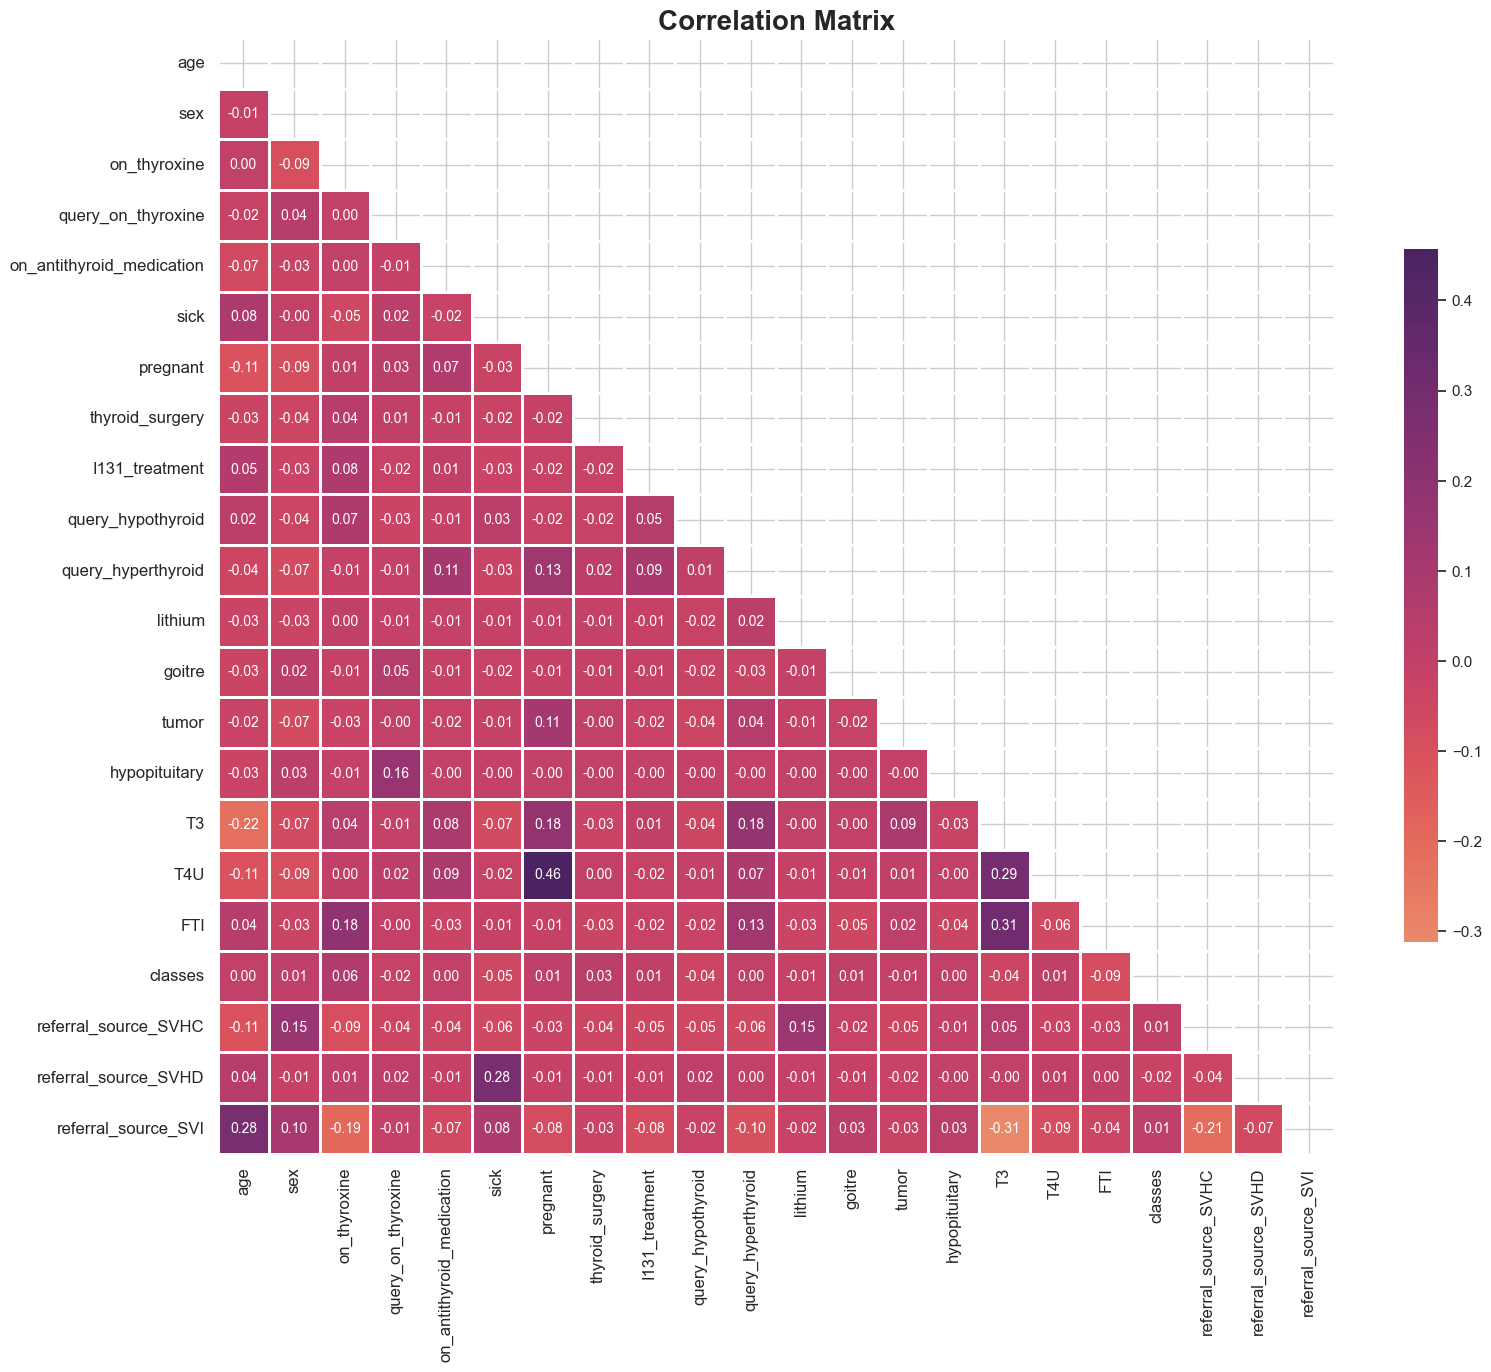

In [423]:
plt.figure(figsize=(18, 18))
sns.set(style="whitegrid")

# Compute the correlation matrix
corr_matrix = new_data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.color_palette("flare", as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5}, annot_kws={"size": 10})

plt.title("Correlation Matrix", fontsize=20, weight='bold')


plt.yticks(rotation=0)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Forward Selection Approach

In [424]:
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size=0.2, random_state=0)

# Initialize RandomForestClassifier
randomclassy = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)

# Initialize Sequential Forward Selection
forward_fs = sfs(randomclassy, 
                 k_features=10,
                 forward=True,
                 floating=False,
                 verbose=2,
                 scoring='accuracy',
                 cv=5)

forward_fs = forward_fs.fit(X_train, y_train)

selected_features = list(forward_fs.k_feature_names_)
print("Selected Features:", selected_features)



[2024-03-10 22:40:54] Features: 1/10 -- score: 0.7803671677467585
[2024-03-10 22:41:24] Features: 2/10 -- score: 0.8164076350829076
[2024-03-10 22:41:52] Features: 3/10 -- score: 0.8353077349179971
[2024-03-10 22:42:19] Features: 4/10 -- score: 0.8495455043259226
[2024-03-10 22:42:44] Features: 5/10 -- score: 0.8586189108928177
[2024-03-10 22:43:08] Features: 6/10 -- score: 0.8579885530895707
[2024-03-10 22:43:28] Features: 7/10 -- score: 0.8559740746207775
[2024-03-10 22:43:47] Features: 8/10 -- score: 0.8392140803981976
[2024-03-10 22:44:06] Features: 9/10 -- score: 0.8520656657762457

Selected Features: ['age', 'sex', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'goitre', 'tumor', 'T3', 'FTI', 'referral_source_SVHC']



[2024-03-10 22:44:23] Features: 10/10 -- score: 0.8563500830900945

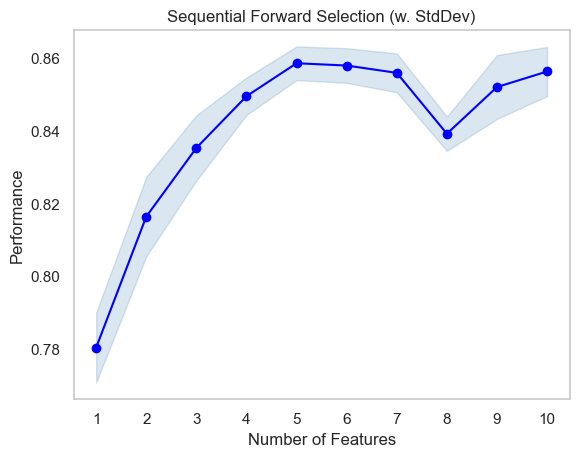

In [425]:
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import pickle

# Plot the performance of the selected features
fig = plot_sfs(forward_fs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


In [433]:

# Transform the data to include only the selected features
X_train_sfs = forward_fs.transform(X_train)
X_test_sfs = forward_fs.transform(X_test)


In [434]:
# Fit the model on the selected features
randomclassy.fit(X_train_sfs, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

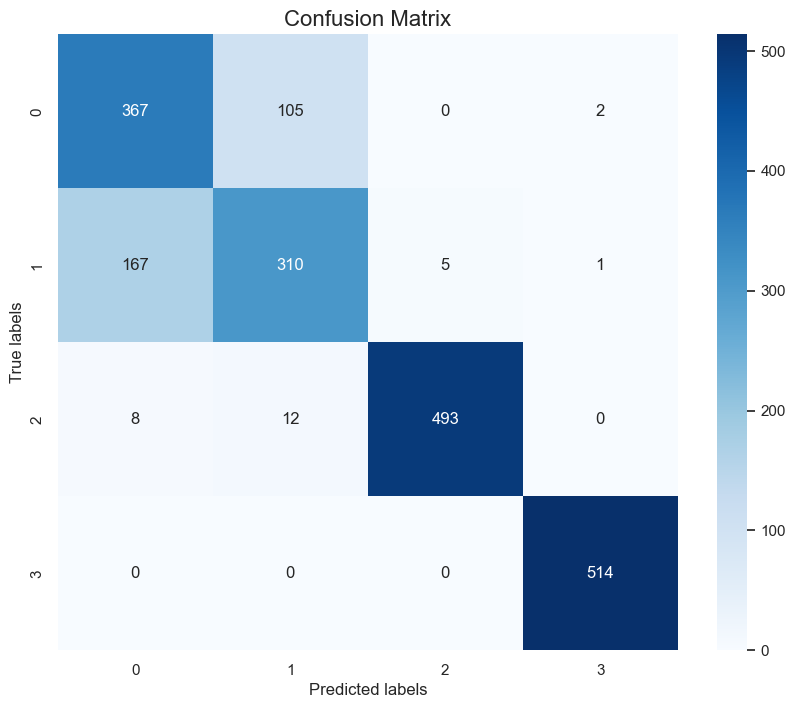

Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.77      0.72       474
         1.0       0.73      0.64      0.68       483
         2.0       0.99      0.96      0.98       513
         3.0       0.99      1.00      1.00       514

    accuracy                           0.85      1984
   macro avg       0.85      0.84      0.84      1984
weighted avg       0.85      0.85      0.85      1984



In [435]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = randomclassy.predict(X_test_sfs)

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels', fontsize=12)
plt.ylabel('True labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=16)
plt.show()
print('Classification Report:\n', classification_report(y_test, y_pred))


In [436]:
# Save the selected features
with open('models/selected_features.pkl', 'wb') as file:
    pickle.dump(selected_features, file)

# Save the data
new_data.to_csv('data/Preprocessed_data.csv', index=False)

# Model Training and Evaluation
def model_evaluation(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        accuracy = accuracy_score(y_train, pred) * 100
    else:
        pred = clf.predict(x_test)
        accuracy = accuracy_score(y_test, pred) * 100
    
    return accuracy

def train_and_evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    train_accuracy = model_evaluation(model, x_train, x_test, y_train, y_test, train=True)
    test_accuracy = model_evaluation(model, x_train, x_test, y_train, y_test, train=False)
    return train_accuracy, test_accuracy

# List of models
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_split=5),
    "Logistic Regression": LogisticRegression(random_state=0, max_iter=10),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10),
    "SVM": SVC(),  # Support Vector Machines
    "Gradient Boosting": GradientBoostingClassifier()  # Gradient Boosting Machines
}

best_model_name = ""
best_train_accuracy = 0
best_test_accuracy = 0

# Train and evaluate models
for model_name, model in models.items():
    train_accuracy, test_accuracy = train_and_evaluate_model(model, X_train, X_test, y_train, y_test)
    
    print("-" * 50)
    print(f"{model_name} - Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")
    
    if test_accuracy > best_test_accuracy:
        best_model_name = model_name
        best_train_accuracy = train_accuracy
        best_test_accuracy = test_accuracy

    # Save the model
    with open(f'models/{model_name.lower().replace(" ", "_")}_model.pkl', 'wb') as file:
        pickle.dump(model, file)

print(f"\nBest Model: {best_model_name}")
print(f"Train Accuracy: {best_train_accuracy:.2f}%")
print(f"Test Accuracy: {best_test_accuracy:.2f}%")


--------------------------------------------------
KNN - Train Accuracy: 96.46%, Test Accuracy: 95.06%
--------------------------------------------------
Decision Tree - Train Accuracy: 86.30%, Test Accuracy: 86.29%
--------------------------------------------------
Logistic Regression - Train Accuracy: 43.66%, Test Accuracy: 44.25%
--------------------------------------------------
Naive Bayes - Train Accuracy: 45.43%, Test Accuracy: 47.33%
--------------------------------------------------
Random Forest - Train Accuracy: 93.49%, Test Accuracy: 92.59%
--------------------------------------------------
SVM - Train Accuracy: 72.38%, Test Accuracy: 72.18%
--------------------------------------------------
Gradient Boosting - Train Accuracy: 91.92%, Test Accuracy: 90.47%

Best Model: KNN
Train Accuracy: 96.46%
Test Accuracy: 95.06%


In [457]:
##Hyper parameter tuning
RF=RandomForestClassifier()
model=RF.fit(X_train,y_train)

model_evaluation(model,X_train,X_test,y_train,y_test,train=True)
model_evaluation(model,X_train,X_test,y_train,y_test,train=False)

98.73991935483872

In [443]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [1, 3, 4, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': ['entropy', 'gini']}

rcv = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=0, n_jobs=-1)
rcv.fit(X_train, y_train)
print("Best Randomized Search CV Estimator:", rcv.best_estimator_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Randomized Search CV Estimator: RandomForestClassifier(max_depth=780, max_features='log2', min_samples_split=3,
                       n_estimators=1000)


In [444]:

# Save the best model obtained from Randomized Search CV
best_random_grid = rcv.best_estimator_
model_evaluation(best_random_grid, X_train, X_test, y_train, y_test, train=False)


98.89112903225806

In [445]:
param_grid = {
    'criterion': [rcv.best_params_['criterion']],
    'max_depth': [rcv.best_params_['max_depth']],
    'max_features': [rcv.best_params_['max_features']],
    'min_samples_leaf': [rcv.best_params_['min_samples_leaf'], 
                         rcv.best_params_['min_samples_leaf']+2, 
                         rcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rcv.best_params_['min_samples_split'] - 2,
                          rcv.best_params_['min_samples_split'] - 1,
                          rcv.best_params_['min_samples_split'], 
                          rcv.best_params_['min_samples_split'] +1,
                          rcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rcv.best_params_['n_estimators'] - 200, rcv.best_params_['n_estimators'] - 100, 
                     rcv.best_params_['n_estimators'], 
                     rcv.best_params_['n_estimators'] + 100, rcv.best_params_['n_estimators'] + 200]
}

In [446]:
print(param_grid)

{'criterion': ['gini'], 'max_depth': [780], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [1, 2, 3, 4, 5], 'n_estimators': [800, 900, 1000, 1100, 1200]}


In [447]:

from sklearn.model_selection import GridSearchCV
RF = RandomForestClassifier()

grid_search=GridSearchCV(estimator=RF,param_grid=param_grid,cv=10,n_jobs=1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=800; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=800; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=800; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=800; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=800; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=800; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=80

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini'], 'max_depth': [780],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [800, 900, 1000, 1100, 1200]},
             verbose=2)

In [448]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=780, max_features='log2', min_samples_split=4,
                       n_estimators=1200)

In [450]:
model_evaluation(best_grid,X_train,X_test,y_train,y_test,train=False)

98.84072580645162

In [451]:
pred=best_grid.predict(X_test)
clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("Test Result:\n===============")
print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
print("---------------------------------")
print(f"Classification Report:\n{clf_report}")
print("---------------------------------")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")

Test Result:
Accuracy Score:98.84%
---------------------------------
Classification Report:
                  0.0         1.0         2.0    3.0  accuracy    macro avg  \
precision    0.961460    1.000000    0.992263    1.0  0.988407     0.988431   
recall       1.000000    0.952381    1.000000    1.0  0.988407     0.988095   
f1-score     0.980352    0.975610    0.996117    1.0  0.988407     0.988019   
support    474.000000  483.000000  513.000000  514.0  0.988407  1984.000000   

           weighted avg  
precision      0.988792  
recall         0.988407  
f1-score       0.988364  
support     1984.000000  
---------------------------------
Confusion Matrix:
[[474   0   0   0]
 [ 19 460   4   0]
 [  0   0 513   0]
 [  0   0   0 514]]



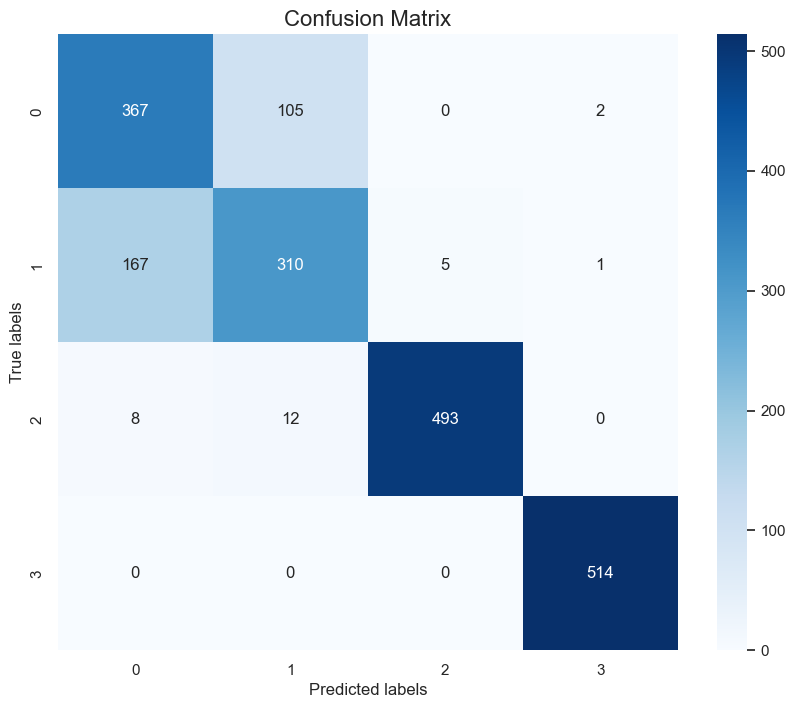

In [452]:
# Confusion Matrix of the best model
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels', fontsize=12)
plt.ylabel('True labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [453]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=best_grid, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 98.64 %


In [454]:
#Now, will convert our final model into pickle file
model_name = "Thyroid_model"
with open(f'models/{model_name.lower().replace(" ", "_")}.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

## Model and EDA is saved Successfully